### Importing packages

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set(style="white")

C:\Users\Joshua Amresh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Reading the data

In [7]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### Target Exploration

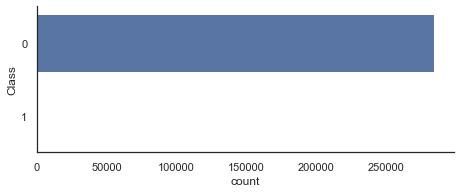

In [5]:
ax = sns.catplot(y="Class", kind="count", data=df, height=2.6, aspect=2.5, orient='h')
plt.show()

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [3]:
df['Class'].value_counts(normalize='true')

0    0.998273
1    0.001727
Name: Class, dtype: float64

### Average of each feature for a class (Do after null imputations done)

In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
some_int_cols = ['V3','V7','V10','V15','V18','V20','V22','V25','V28','Amount']

In [13]:
df.groupby(['Class'])[some_int_cols].mean()

,V3,V7,V10,V15,V18,V20,V22,V25,V28,Amount
Class,,,,,,,,,,
0,0.012171,0.009637,0.009824,0.000161,0.003887,-0.000644,-0.000024,-0.000072,-0.000131,88.291022
1,-7.033281,-5.568731,-5.676883,-0.092929,-2.246308,0.372319,0.014049,0.041449,0.075667,122.211321


### EDA Function 1 (Analysing numeric feature distribution)

This function provides the outliers present in a feature as well as a histogram to see whether the distribution is guassian or skewed

In [14]:
def data_distribution(data):
    """ Draws a chart showing data distribution
        by combining an histogram and a boxplot
        
    Parameters
    ----------
    data: array or series
        the data to draw the distribution for
        
    """
    
    x = np.array(data)
    
    # set the number of bins using the Rice rule
    # n_bins = twice cube root of number of observations
    n = len(x)
    n_bins = round(2 * n**(1/3))
    
    fig = plt.figure()
    
    # histogram
    ax1 = fig.add_axes([0.1, 0.3, 0.8, 0.6])
    ax1 = plt.hist(x, bins=n_bins, alpha=0.7)
    plt.grid(alpha=.5)
    
    # boxplot
    ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.2])
    ax2 = plt.boxplot(x, vert=False, widths=0.7)
    plt.grid(alpha=.5)
           
    plt.show()

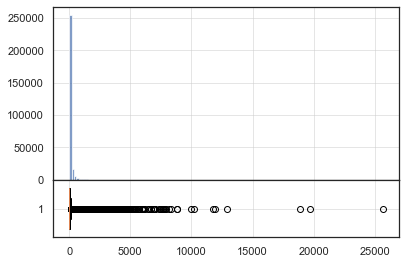

In [15]:
data_distribution(df['Amount'])

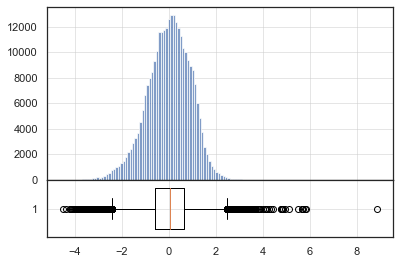

In [16]:
data_distribution(df['V15'])

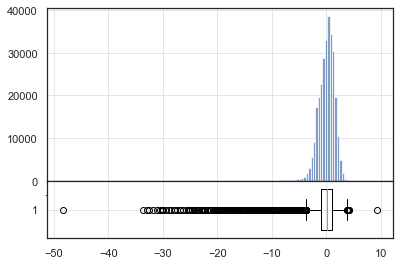

In [17]:
data_distribution(df['V3'])

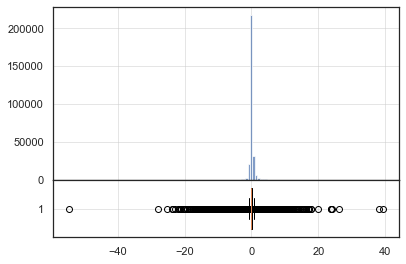

In [18]:
data_distribution(df['V20'])

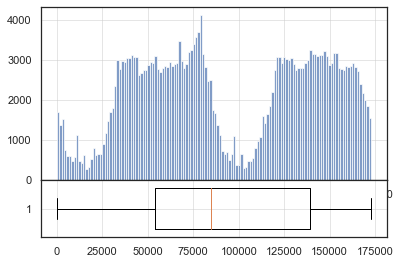

In [19]:
data_distribution(df['Time'])

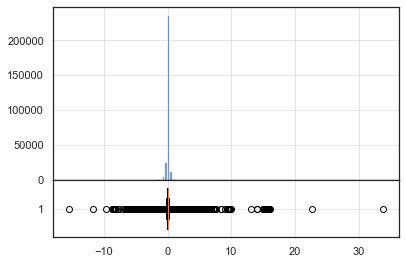

In [21]:
data_distribution(df['V28'])

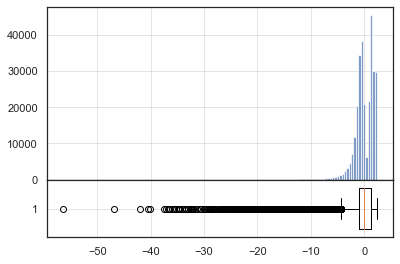

In [22]:
data_distribution(df['V1'])

### Bivariate Analysis

In [ ]:
sns.pairplot(df,vars=df.columns,hue ='Class',plot_kws={'alpha':0.1})
plt.show()

The above pairplot gives 1 vs 1 plots for each feature with every other feature differentiated by the output class

In [ ]:
df_positive = df[df['Class'] == 1]
sns.pairplot(df_positive,vars=df_positive.columns,plot_kws={'alpha':0.1})
plt.show()

Laptop not able to handle the number of features so skipping this for now

### Analysing the Numeric feature with KDE (Kernal Density Estimation) plot - EDA Function 2

* KDE Plot Smoothens out even if there are no values for a value
* The Y axis gives the probablity density function (AUC)

In [3]:
# KDE Plot Smoothens out even if there are no values for a value
# The Y axis gives the probablity density function (AUC)
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE Plot for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Class'] == 0][feature].dropna(), color= 'dodgerblue', label= 'Not Fraud - 0')
    ax1 = sns.kdeplot(df[df['Class'] == 1][feature].dropna(), color= 'orange', label= 'Fraud - 1')

The peaks of a density plot help display where values are concentrated over the interval

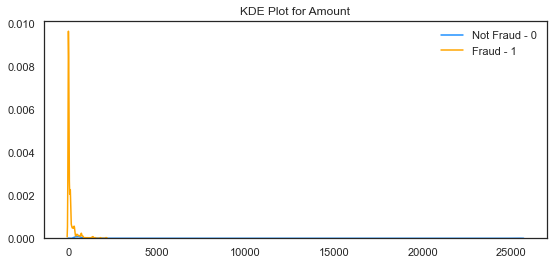

In [4]:
kdeplot('Amount')
plt.show()

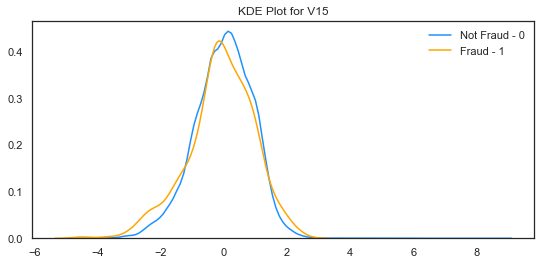

In [5]:
kdeplot('V15')
plt.show()

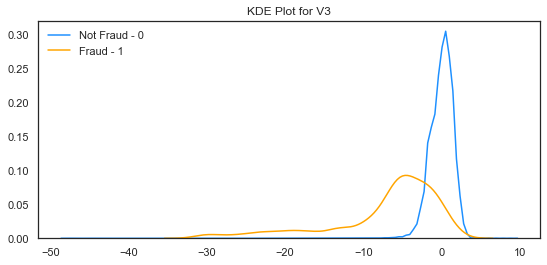

In [6]:
kdeplot('V3')
plt.show()

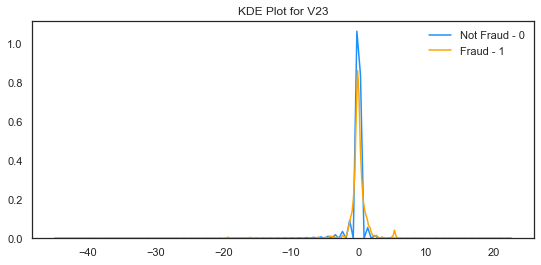

In [7]:
kdeplot('V23')
plt.show()

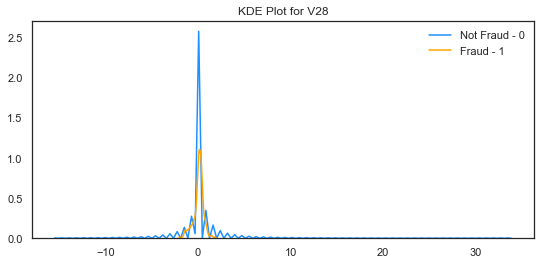

In [8]:
kdeplot('V28')
plt.show()

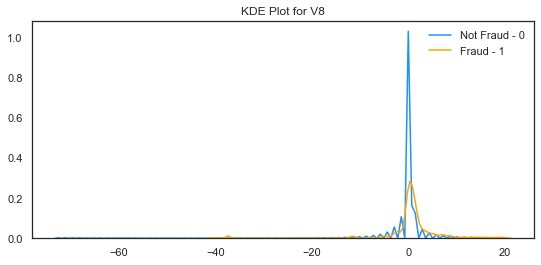

In [9]:
kdeplot('V8')
plt.show()

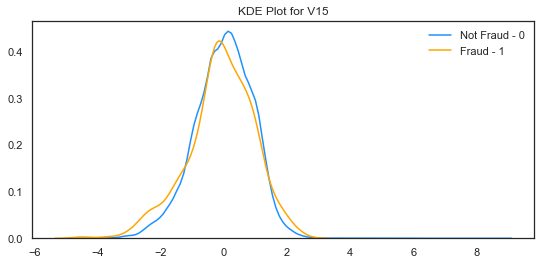

In [10]:
kdeplot('V15')
plt.show()

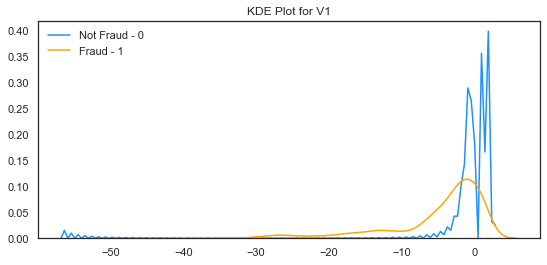

In [11]:
kdeplot('V1')
plt.show()

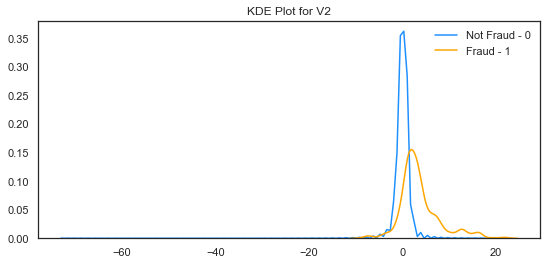

In [12]:
kdeplot('V2')
plt.show()

### Categorical feature Analysis

In [3]:
titanic_data = pd.read_csv('titanic_train.csv')

In [14]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
cat_cols = ['Pclass','Sex','SibSp','Embarked']

In [16]:
for i in range(0,len(cat_cols)):
    print(str(cat_cols[i]) + " - Number of Unique Values: " + str(titanic_data[cat_cols[i]].nunique()))

Pclass - Number of Unique Values: 3
Sex - Number of Unique Values: 2
SibSp - Number of Unique Values: 7
Embarked - Number of Unique Values: 3


### EDA Function 3

In [20]:
def barplot_percentages(feature):
    #fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
    #fig, ax = plt.subplots()
    ax1 = titanic_data.groupby(feature)['Survived'].value_counts(normalize=True).unstack()
    #plt.figure(figsize=(2,3))
    ax1.plot(kind='bar', stacked='True',figsize=(8,4))
    int_level = titanic_data[feature].value_counts()

    plt.figure(figsize=(8,4))
    sns.barplot(int_level.index, int_level.values, alpha=0.8)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(str(feature), fontsize=12)
    plt.show()

This function helps in showing how much % of a category in a categorical feature belong to each of the output class

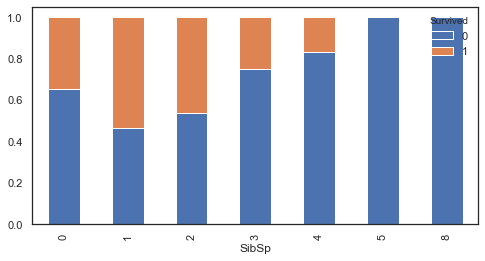

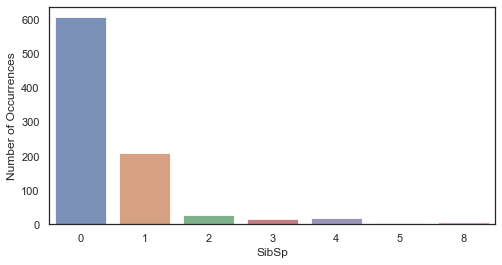

In [21]:
barplot_percentages("SibSp")

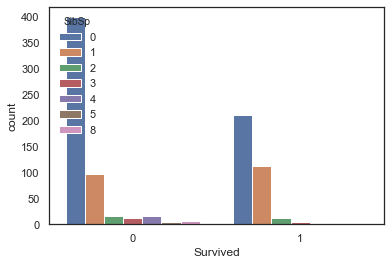

In [22]:
#Relationship between two categorical variables
sns.countplot(x="Survived", hue = "SibSp", data = titanic_data)

In [23]:
pd.crosstab(titanic_data['Survived'], titanic_data['SibSp'])

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


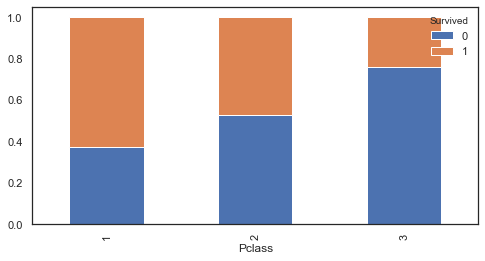

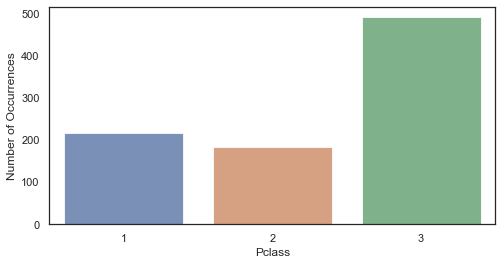

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


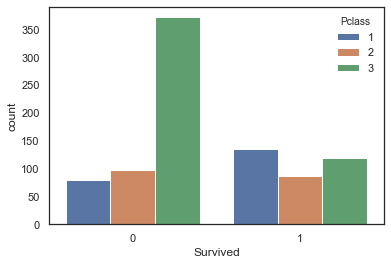

In [24]:
barplot_percentages("Pclass")

#Relationship between two categorical variables
sns.countplot(x="Survived", hue = "Pclass", data = titanic_data)

pd.crosstab(titanic_data['Survived'], titanic_data['Pclass'])

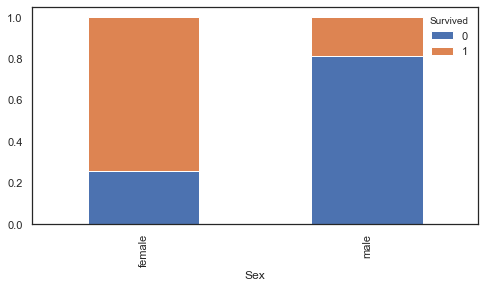

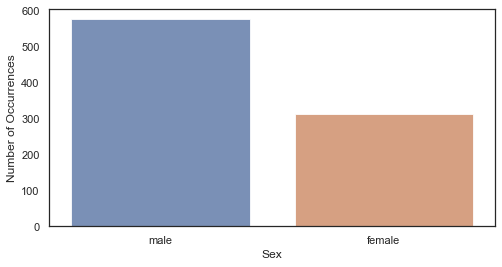

Sex,female,male
Survived,,
0,81,468
1,233,109


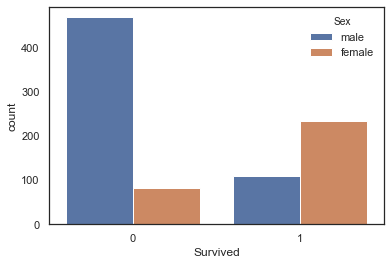

In [25]:
barplot_percentages("Sex")

#Relationship between two categorical variables
sns.countplot(x="Survived", hue = "Sex", data = titanic_data)

pd.crosstab(titanic_data['Survived'], titanic_data['Sex'])

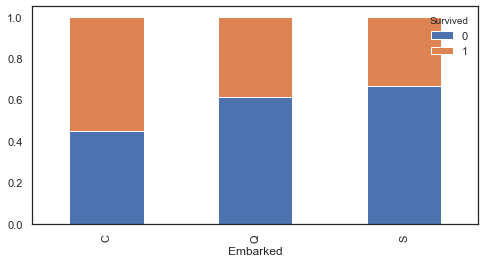

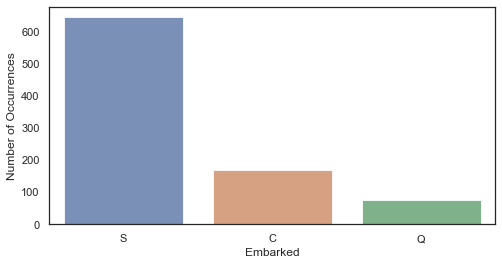

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


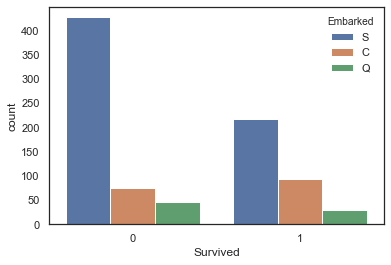

In [26]:
barplot_percentages("Embarked")

#Relationship between two categorical variables
sns.countplot(x="Survived", hue = "Embarked", data = titanic_data)

pd.crosstab(titanic_data['Survived'], titanic_data['Embarked'])

### EDA blocks from online sites

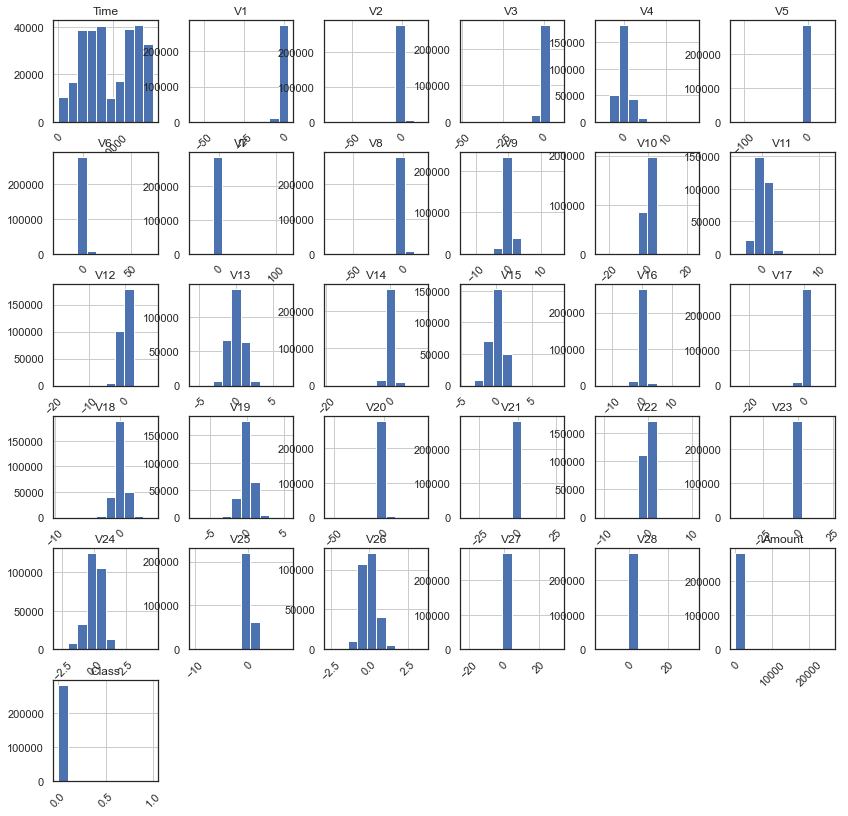

In [28]:
df.hist(figsize=(14,14), xrot=45)
plt.show()

From the above plots the interpretation is that very less number of bins means potential for outliers in the opposite side of where the less number of bins are present (eg, for feature "V1" there is potential for outliers on the left). Even if there are lots of bins but still they are not occupying all the canvas, there are potential for outliers (eg, 'V15' - can verify with EDA function 1 plots above). From above, only 'Time' has occupied the whole canvas and there is no potential for outliers and this can be verified along with the EDA function 1 plots above

### Summary Stats for numerical and categorical features

In [29]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [30]:
titanic_data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Thomas, Master. Assad Alexander",male,1601,B96 B98,S
freq,1,577,7,4,644


### Group numeric features by each categorical feature

Here we will see how all the other numeric features change with each categorical feature by summarizing the numeric features across the classes. We use the Dataframe’s groupby function to group the data by a category and calculate a metric (such as mean, median, min, std, etc) across the various numeric features.

We use display() which results to a cleaner table than print().

In [31]:
for column in titanic_data.select_dtypes(include='object'):
    if titanic_data[column].nunique() < 10:
        display(titanic_data.groupby(column).mean())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


### Outliers function

In [33]:
def findoutliers(column):
    outliers = []
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1-(1.5*IQR)
    upper_limit = Q3+(1.5*IQR)
    for a in column:
        if a>upper_limit or a<lower_limit:
            outliers.append(a)
    return np.array(outliers)

In [34]:
print(len(findoutliers(titanic_data.Fare)))

116


In [35]:
findoutliers(titanic_data.Fare)

array([ 71.2833, 263.    , 146.5208,  82.1708,  76.7292,  80.    ,
        83.475 ,  73.5   , 263.    ,  77.2875, 247.5208,  73.5   ,
        77.2875,  79.2   ,  66.6   ,  69.55  ,  69.55  , 146.5208,
        69.55  , 113.275 ,  76.2917,  90.    ,  83.475 ,  90.    ,
        79.2   ,  86.5   , 512.3292,  79.65  , 153.4625, 135.6333,
        77.9583,  78.85  ,  91.0792, 151.55  , 247.5208, 151.55  ,
       110.8833, 108.9   ,  83.1583, 262.375 , 164.8667, 134.5   ,
        69.55  , 135.6333, 153.4625, 133.65  ,  66.6   , 134.5   ,
       263.    ,  75.25  ,  69.3   , 135.6333,  82.1708, 211.5   ,
       227.525 ,  73.5   , 120.    , 113.275 ,  90.    , 120.    ,
       263.    ,  81.8583,  89.1042,  91.0792,  90.    ,  78.2667,
       151.55  ,  86.5   , 108.9   ,  93.5   , 221.7792, 106.425 ,
        71.    , 106.425 , 110.8833, 227.525 ,  79.65  , 110.8833,
        79.65  ,  79.2   ,  78.2667, 153.4625,  77.9583,  69.3   ,
        76.7292,  73.5   , 113.275 , 133.65  ,  73.5   , 512.3

In [36]:
titanic_data.shape

(891, 12)

### Some Simple Plots

Text(0.5, 1.0, 'Number of Passengers by Pclass')

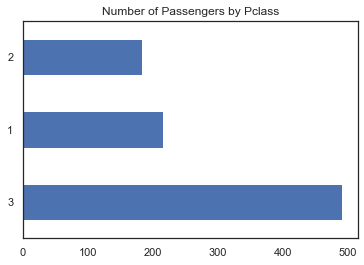

In [11]:
titanic_data['Pclass'].value_counts(sort=True).plot.barh().set_title('Number of Passengers by Pclass')

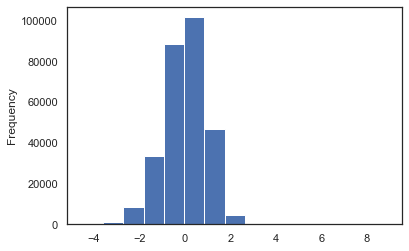

In [8]:
df['V15'].plot.hist(bins=15)